### Importando bibliotecas

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns

### Importando dataset

In [26]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Separando features e targets

In [4]:
X = dataset.drop(['quality'], axis=1)
y = dataset['quality']

### Separando dados entre treino e teste

In [5]:
# Normalizando os valores
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Criando e treinando o modelo SGDClassifier

In [6]:
model = SGDClassifier(loss="squared_error", max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3346938775510204

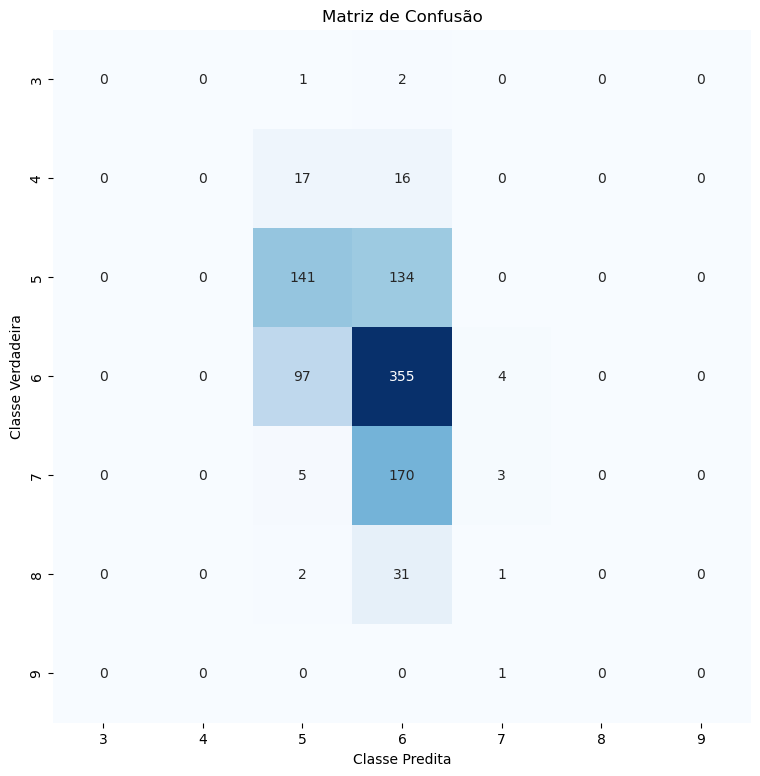

In [36]:
def plot_confusion_matrix(cm, labels):    
    plt.figure(figsize=(len(labels)+2, len(labels)+2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.title('Matriz de Confusão')
    plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, labels)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Faz previsões no conjunto de teste


# Calcula o erro médio quadrático na amostra de teste
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

MAE: 0.8520408163265306
MSE: 1.2581632653061225
RMSE: 1.1216787709973486
R² score: -0.6515070545158328


In [21]:
from collections import Counter
# summarize class distribution
counter = Counter(y_test)
print(counter)
counter = Counter(y_pred)
print(counter)
counter = Counter(y_train)
print(counter)

Counter({6: 456, 5: 275, 7: 178, 8: 34, 4: 33, 3: 3, 9: 1})
Counter({5: 399, 6: 386, 7: 155, 8: 32, 4: 6, 3: 2})
Counter({6: 1742, 5: 1182, 7: 702, 8: 141, 4: 130, 3: 17, 9: 4})


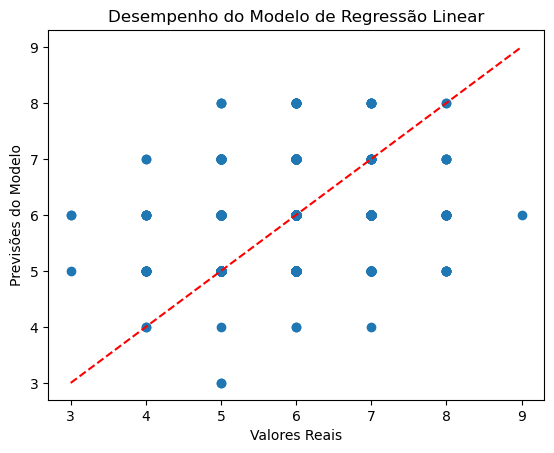

In [14]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Desempenho do Modelo de Regressão Linear')
plt.show()

## Utilizando GridSearchCV para os melhores parâmetros 

In [29]:
from sklearn.model_selection import GridSearchCV


# Definir os parâmetros a serem ajustados
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

# Criar uma instância do SGDClassifier
sgd_clf = SGDClassifier(learning_rate='invscaling', eta0=0.01)


# Criar o objeto GridSearchCV
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, error_score='raise')

# Executar a pesquisa de grade
grid_search.fit(X, y)

# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_


In [30]:
print(best_params)

{'alpha': 0.01, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l2'}


In [32]:
model = SGDClassifier(loss="log", alpha=0.01,learning_rate='constant', penalty='l2', max_iter=1000, tol=1e-3,eta0=0.01)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5091836734693878

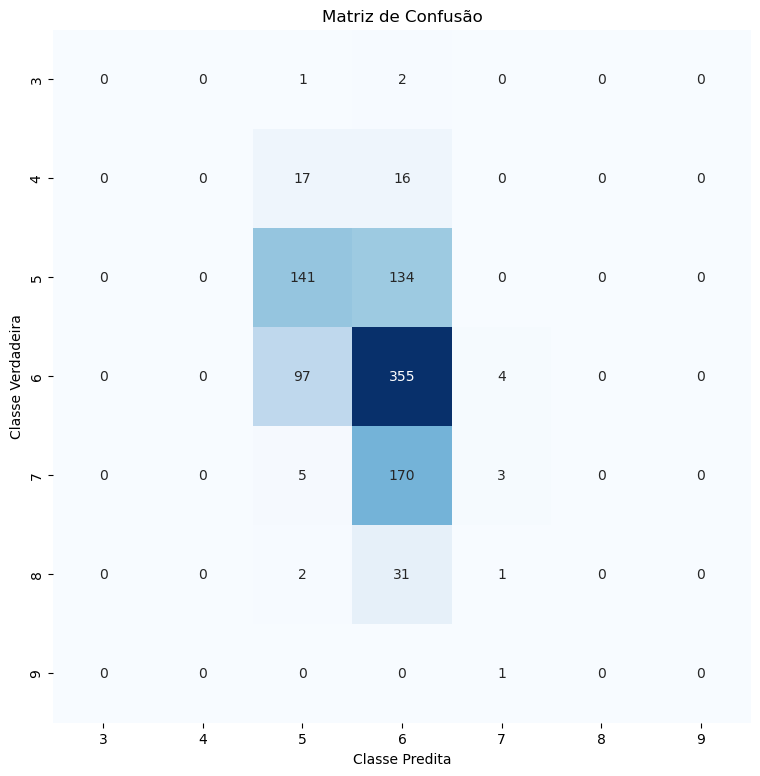

In [37]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, labels)

In [33]:

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

MAE: 0.5540816326530612
MSE: 0.6887755102040817
RMSE: 0.8299250027587323
R² score: 0.09589029862271925


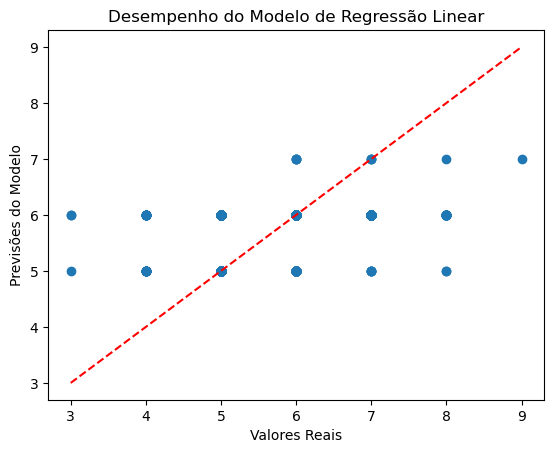

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Desempenho do Modelo de Regressão Linear')
plt.show()